In [1]:
import pandas as pd
import numpy as np

In [2]:
odds = pd.read_csv('nba_game_odds.csv')
stats = pd.read_csv('nba_game_stats.csv')

In [3]:
odds.head()

,Unnamed: 0,Date,Season,Home,Away,Home Win By (Vegas)
0,0,2020-12-28,2020,Atlanta,Detroit,10.5
1,1,2021-01-02,2020,Atlanta,Cleveland,5.5
2,2,2021-01-04,2020,Atlanta,NewYork,7
3,3,2021-01-06,2020,Atlanta,Charlotte,6
4,4,2021-01-11,2020,Atlanta,Philadelphia,6


In [4]:
stats.head()

,Unnamed: 0,Date,Home Team,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,...,Away eFG%,Away FTr,Away ORB%,Away DRB%,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg
0,0,2020-12-28,Atlanta Hawks,128,120,0.610,0.390,20.5,68.5,75.0,...,0.505,0.245,31.5,79.5,55.8,7.2,10.0,6.9,122.7,130.8
1,1,2020-12-28,Brooklyn Nets,111,116,0.480,0.170,24.5,69.8,68.3,...,0.480,0.296,30.2,75.5,47.6,9.1,6.9,14.6,106.0,101.5
2,2,2020-12-28,Denver Nuggets,124,111,0.609,0.368,25.0,89.1,67.4,...,0.547,0.267,10.9,75.0,64.1,7.7,5.4,13.5,107.0,119.5
3,3,2020-12-28,Los Angeles Lakers,107,115,0.529,0.207,13.6,83.3,48.8,...,0.554,0.163,16.7,86.4,62.8,9.0,10.0,8.4,115.1,107.1
4,4,2020-12-28,Oklahoma City Thunder,109,110,0.552,0.221,16.7,78.9,52.5,...,0.576,0.163,21.1,83.3,55.8,9.1,12.5,14.8,110.9,109.9


In [5]:
odds.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [6]:
stats.drop(columns='Unnamed: 0', axis=1, inplace=True)

In [7]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 11656 entries, 0 to 11655
Data columns (total 27 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Date                 11656 non-null  object 
 1   Home Team            11656 non-null  object 
 2   Home Points For      11656 non-null  int64  
 3   Home Points Against  11656 non-null  int64  
 4   Home eFG%            11656 non-null  float64
 5   Home FTr             11656 non-null  float64
 6   Home ORB%            11656 non-null  float64
 7   Home DRB%            11656 non-null  float64
 8   Home AST%            11656 non-null  float64
 9   Home STL%            11656 non-null  float64
 10  Home BLK%            11656 non-null  float64
 11  Home TOV%            11656 non-null  float64
 12  Home ORtg            11656 non-null  float64
 13  Home DRtg            11656 non-null  float64
 14  Away Team            11656 non-null  object 
 15  Away Points For      11656 non-null 

In [8]:
stats.describe()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away eFG%,Away FTr,Away ORB%,Away DRB%,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg
count,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,...,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000,11656.000000
mean,105.651253,103.144389,0.517640,0.275763,24.371517,76.524871,59.608262,7.998121,8.624262,12.523070,...,0.506115,0.264916,23.476373,75.629538,58.006306,8.026922,8.017150,12.656426,107.369278,109.983708
std,13.016715,13.197643,0.066697,0.098208,7.617301,7.391644,9.902234,2.993069,4.266007,3.409931,...,0.065914,0.094591,7.391530,7.617418,10.260596,2.934959,4.102849,3.479213,11.639634,11.348544
min,59.000000,56.000000,0.301000,0.012000,2.000000,45.900000,23.700000,0.000000,0.000000,1.000000,...,0.267000,0.011000,0.000000,44.400000,20.000000,0.000000,0.000000,1.900000,62.400000,70.500000
25%,97.000000,94.000000,0.471000,0.207000,19.000000,71.700000,52.900000,5.900000,5.600000,10.100000,...,0.462000,0.198000,18.400000,70.600000,51.300000,6.000000,5.100000,10.200000,99.400000,102.300000
50%,105.000000,103.000000,0.516000,0.266000,24.200000,76.900000,60.000000,7.800000,8.200000,12.400000,...,0.506000,0.256000,23.100000,75.800000,58.100000,7.900000,7.600000,12.500000,107.400000,109.800000
75%,114.000000,112.000000,0.563000,0.333000,29.400000,81.600000,66.700000,9.900000,11.300000,14.700000,...,0.549000,0.321000,28.300000,81.000000,65.000000,9.900000,10.500000,15.000000,115.200000,117.500000
max,161.000000,168.000000,0.759000,0.806000,55.600000,100.000000,93.300000,21.700000,38.500000,25.900000,...,0.779000,0.809000,54.100000,98.000000,96.600000,20.000000,29.800000,27.800000,153.500000,155.600000


In [9]:
stats['Date'] = pd.to_datetime(stats['Date'], format='%Y-%m-%d')

In [10]:
stats.columns = ['Date','Home','Home Points For','Home Points Against','Home eFG%','Home FTr',
                           'Home ORB%', 'Home DRB%','Home AST%','Home STL%','Home BLK%', 'Home TOV%','Home ORtg', 'Home DRtg',
                           'Away','Away Points For','Away Points Against','Away eFG%','Away FTr',
                           'Away ORB%', 'Away DRB%','Away AST%','Away STL%', 'Away BLK%', 'Away TOV%','Away ORTG', 'Away DRtg']


In [11]:
odds['Home'].unique()

array(['Atlanta', 'Boston', 'Brooklyn', 'Charlotte', 'Chicago',
       'Cleveland', 'Dallas', 'Denver', 'Detroit', 'GoldenState',
       'Houston', 'Indiana', 'LAClippers', 'LALakers', 'Memphis', 'Miami',
       'Milwaukee', 'Minnesota', 'NewOrleans', 'NewYork', 'OklahomaCity',
       'Orlando', 'Philadelphia', 'Phoenix', 'Portland', 'Sacramento',
       'SanAntonio', 'Toronto', 'Utah', 'Washington', 'NewJersey'],
      dtype=object)

In [12]:
stats['Home'].unique()

array(['Atlanta Hawks', 'Brooklyn Nets', 'Denver Nuggets',
       'Los Angeles Lakers', 'Oklahoma City Thunder', 'Houston Rockets',
       'Indiana Pacers', 'New Orleans Pelicans', 'Orlando Magic',
       'Philadelphia 76ers', 'Golden State Warriors', 'Miami Heat',
       'Milwaukee Bucks', 'Toronto Raptors', 'New York Knicks',
       'Phoenix Suns', 'Sacramento Kings', 'Charlotte Hornets',
       'Cleveland Cavaliers', 'Portland Trail Blazers',
       'Washington Wizards', 'Chicago Bulls', 'Memphis Grizzlies',
       'Los Angeles Clippers', 'Minnesota Timberwolves', 'Utah Jazz',
       'San Antonio Spurs', 'Dallas Mavericks', 'Boston Celtics',
       'Detroit Pistons', 'Charlotte Bobcats', 'New Orleans Hornets',
       'New Jersey Nets'], dtype=object)

In [13]:
#standardizing team names between odds and stats data so they can be combined later
for i in range(len(stats)):
    for place in ['Home', 'Away']:
        if stats[place][i] == 'Los Angeles Lakers':
            stats[place][i] = 'Lakers'
        elif stats[place][i] == 'Los Angeles Clippers':
            stats[place][i] = 'Clippers'
        else:    
            stats[place][i] = stats[place][i].replace(' {}'.format(stats[place][i].split()[-1]),'')
stats.head()

<ipython-input-13-d90f70a2175d>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats[place][i] = stats[place][i].replace(' {}'.format(stats[place][i].split()[-1]),'')
<ipython-input-13-d90f70a2175d>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats[place][i] = 'Lakers'
<ipython-input-13-d90f70a2175d>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats[place][i] = 'Clippers'


,Date,Home,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,...,Away eFG%,Away FTr,Away ORB%,Away DRB%,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg
0,2020-12-28,Atlanta,128,120,0.610,0.390,20.5,68.5,75.0,5.1,...,0.505,0.245,31.5,79.5,55.8,7.2,10.0,6.9,122.7,130.8
1,2020-12-28,Brooklyn,111,116,0.480,0.170,24.5,69.8,68.3,11.9,...,0.480,0.296,30.2,75.5,47.6,9.1,6.9,14.6,106.0,101.5
2,2020-12-28,Denver,124,111,0.609,0.368,25.0,89.1,67.4,7.7,...,0.547,0.267,10.9,75.0,64.1,7.7,5.4,13.5,107.0,119.5
3,2020-12-28,Lakers,107,115,0.529,0.207,13.6,83.3,48.8,6.0,...,0.554,0.163,16.7,86.4,62.8,9.0,10.0,8.4,115.1,107.1
4,2020-12-28,Oklahoma City,109,110,0.552,0.221,16.7,78.9,52.5,9.1,...,0.576,0.163,21.1,83.3,55.8,9.1,12.5,14.8,110.9,109.9


In [14]:
#standardize odds data
for i in range(len(odds)):
    for place in ['Home', 'Away']:
        if odds[place][i] == 'GoldenState':
            odds[place][i] = 'Golden State'
        elif odds[place][i] == 'LAClippers':
            odds[place][i] = 'Clippers'
        elif odds[place][i] == 'LALakers':
            odds[place][i] = 'Lakers'
        elif odds[place][i] == 'NewOrleans':
            odds[place][i] = 'New Orleans'
        elif odds[place][i] == 'NewYork':
            odds[place][i] = 'New York'
        elif odds[place][i] == 'OklahomaCity':
            odds[place][i] = 'Oklahoma City'
        elif odds[place][i] == 'SanAntonio':
            odds[place][i] = 'San Antonio'
        elif odds[place][i] == 'NewJersey':
            odds[place][i] = 'NewJersey'
odds.head()

<ipython-input-14-ff79eb82b092>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds[place][i] = 'New York'
<ipython-input-14-ff79eb82b092>:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds[place][i] = 'Clippers'
<ipython-input-14-ff79eb82b092>:9: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds[place][i] = 'Lakers'
<ipython-input-14-ff79eb82b092>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice fro

,Date,Season,Home,Away,Home Win By (Vegas)
0,2020-12-28,2020,Atlanta,Detroit,10.5
1,2021-01-02,2020,Atlanta,Cleveland,5.5
2,2021-01-04,2020,Atlanta,New York,7
3,2021-01-06,2020,Atlanta,Charlotte,6
4,2021-01-11,2020,Atlanta,Philadelphia,6


Make sure the team names are normalized

In [15]:
odds['Home'].unique().sort() == stats['Home'].unique().sort()

True

In [16]:
odds['Away'].unique().sort() == stats['Away'].unique().sort()

True

In [17]:
#create 'gamedID' column and set as index to easily identify games
odds['Date'] = pd.to_datetime(odds['Date'], format='%Y-%m-%d')
for table in [odds, stats]:
    ids = []
    for i in range(len(table)):
        game_id = '{} {} @ {}'.format(table['Date'][i], table['Away'][i], table['Home'][i])
        ids.append(game_id)

    table['GameID'] = ids
    table.set_index('GameID', drop=True, inplace=True)

In [18]:
stats.head()

,Date,Home,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,...,Away eFG%,Away FTr,Away ORB%,Away DRB%,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg
GameID,,,,,,,,,,,,,,,,,,,,,
2020-12-28 00:00:00 Detroit @ Atlanta,2020-12-28,Atlanta,128,120,0.610,0.390,20.5,68.5,75.0,5.1,...,0.505,0.245,31.5,79.5,55.8,7.2,10.0,6.9,122.7,130.8
2020-12-28 00:00:00 Memphis @ Brooklyn,2020-12-28,Brooklyn,111,116,0.480,0.170,24.5,69.8,68.3,11.9,...,0.480,0.296,30.2,75.5,47.6,9.1,6.9,14.6,106.0,101.5
2020-12-28 00:00:00 Houston @ Denver,2020-12-28,Denver,124,111,0.609,0.368,25.0,89.1,67.4,7.7,...,0.547,0.267,10.9,75.0,64.1,7.7,5.4,13.5,107.0,119.5
2020-12-28 00:00:00 Portland Trail @ Lakers,2020-12-28,Lakers,107,115,0.529,0.207,13.6,83.3,48.8,6.0,...,0.554,0.163,16.7,86.4,62.8,9.0,10.0,8.4,115.1,107.1
2020-12-28 00:00:00 Utah @ Oklahoma City,2020-12-28,Oklahoma City,109,110,0.552,0.221,16.7,78.9,52.5,9.1,...,0.576,0.163,21.1,83.3,55.8,9.1,12.5,14.8,110.9,109.9


In [19]:
#create 'Home Win By' column to serve as the 'target' when running through models
stats['Home Win By'] = stats['Home Points For'] - stats['Home Points Against']

In [20]:
odds.head()

,Date,Season,Home,Away,Home Win By (Vegas)
GameID,,,,,
2020-12-28 00:00:00 Detroit @ Atlanta,2020-12-28,2020,Atlanta,Detroit,10.5
2021-01-02 00:00:00 Cleveland @ Atlanta,2021-01-02,2020,Atlanta,Cleveland,5.5
2021-01-04 00:00:00 New York @ Atlanta,2021-01-04,2020,Atlanta,New York,7
2021-01-06 00:00:00 Charlotte @ Atlanta,2021-01-06,2020,Atlanta,Charlotte,6
2021-01-11 00:00:00 Philadelphia @ Atlanta,2021-01-11,2020,Atlanta,Philadelphia,6


In [21]:
odds.sort_index(inplace=True)

In [22]:
stats.sort_index(inplace=True)

In [23]:
stats['Season'] = odds['Season']

In [24]:
#create 'Season' column to use in for loop later
for i in range(len(stats)):    
    stats['Season'][i] = odds['Season'][i]

<ipython-input-24-40c3470f500e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats['Season'][i] = odds['Season'][i]


In [25]:
#these are the final home and away dfs, which contain each team's averages going into every game
all_home = pd.DataFrame(columns=['Home Points For','Home Points Against','Home eFG%','Home FTr',
                                      'Home ORB%', 'Home DRB%','Home AST%','Home STL%','Home BLK%', 'Home TOV%','Home ORtg', 
                                      'Home DRtg', 'Home GP'])

all_away = pd.DataFrame(columns=['Away Points For','Away Points Against','Away eFG%',
                                      'Away FTr','Away ORB%', 'Away DRB%','Away AST%','Away STL%', 'Away BLK%', 'Away TOV%',
                                      'Away ORTG', 'Away DRtg', 'Away GP'])

In [26]:
#for loop to convert data from the resulting stats from each game to the avg stats going into each game
for season in range(2011,2021):
    for team in stats['Home'].unique():
        #gather all games relevant to this team in this season
        all_df = stats[(((stats['Home']==team) & (stats['Season']==season)) | 
                        ((stats['Away']==team) & (stats['Season']==season)))]
        
        #separate into home and away df's because they go in different columns at the end
        #we are going to concat axis=1
        home_all_df = all_df[all_df['Home']==team]
        away_all_df = all_df[all_df['Away']==team]
        
        #select stats relevant to home/away team
        home_df = home_all_df[home_all_df.columns[2:14]]
        away_df = away_all_df[away_all_df.columns[15:27]]
        
        home_df['Home Win Rate'] = 0
        away_df['Away Win Rate'] = 0
        
        #include a win rate column
        for i in range(len(home_df)):
            if home_df['Home Points For'][i] > home_df['Home Points Against'][i]:
                home_df['Home Win Rate'][i] = 1
            else:
                home_df['Home Win Rate'][i] = 0
        
        for x in range(len(away_df)):
            if away_df['Away Points For'][x] > away_df['Away Points Against'][x]:
                away_df['Away Win Rate'][x] = 1
            else:
                away_df['Away Win Rate'][x] = 0

        #create dfs for running total throughout the season
        #also create game played column, 'GP', later to be used to take averages
        home_total = np.cumsum(home_df, axis=0)
        home_total['Home GP'] = list(range(1,len(home_df)+1))
        away_total = np.cumsum(away_df, axis=0)
        away_total['Away GP'] = list(range(1,len(away_df)+1))
        
        #create df for rolling avg stats by dividing by 'GP'
        home_avg = home_total.div(home_total['Home GP'], axis=0)
        away_avg = away_total.div(away_total['Away GP'], axis=0)
        
        #redo the 'GP' columns
        home_avg['Home GP'] = list(range(1,len(home_df)+1))
        away_avg['Away GP'] = list(range(1,len(away_df)+1))
        
        #append team's rolling avg stats for this season to aggregate df
        all_home = all_home.append(home_avg)
        all_away = all_away.append(away_avg)

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a cop

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 0
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a cop

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a cop

<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 0
C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_glo

<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a cop

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win 

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

C:\Users\Daniel\anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3437: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  exec(code_obj, self.user_global_ns, self.user_ns)
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'][i] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win 

<ipython-input-26-945f107d2c31>:29: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 1
<ipython-input-26-945f107d2c31>:31: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'][x] = 0
<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: Setting

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

<ipython-input-26-945f107d2c31>:17: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rate'] = 0
<ipython-input-26-945f107d2c31>:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  away_df['Away Win Rate'] = 0
<ipython-input-26-945f107d2c31>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  home_df['Home Win Rat

In [27]:
all_home.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11656 entries, 2011-12-25 00:00:00 Boston @ New York to 2021-05-16 00:00:00 Cleveland @ Brooklyn
Data columns (total 14 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Home Points For      11656 non-null  float64
 1   Home Points Against  11656 non-null  float64
 2   Home eFG%            11656 non-null  float64
 3   Home FTr             11656 non-null  float64
 4   Home ORB%            11656 non-null  float64
 5   Home DRB%            11656 non-null  float64
 6   Home AST%            11656 non-null  float64
 7   Home STL%            11656 non-null  float64
 8   Home BLK%            11656 non-null  float64
 9   Home TOV%            11656 non-null  float64
 10  Home ORtg            11656 non-null  float64
 11  Home DRtg            11656 non-null  float64
 12  Home GP              11656 non-null  object 
 13  Home Win Rate        11656 non-null  float64
dtypes: float64(13), obje

In [28]:
all_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 72 entries, 2020-12-22 00:00:00 Golden State @ Brooklyn to 2021-05-16 00:00:00 Cleveland @ Brooklyn
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 72 non-null     datetime64[ns]
 1   Home                 72 non-null     object        
 2   Home Points For      72 non-null     int64         
 3   Home Points Against  72 non-null     int64         
 4   Home eFG%            72 non-null     float64       
 5   Home FTr             72 non-null     float64       
 6   Home ORB%            72 non-null     float64       
 7   Home DRB%            72 non-null     float64       
 8   Home AST%            72 non-null     float64       
 9   Home STL%            72 non-null     float64       
 10  Home BLK%            72 non-null     float64       
 11  Home TOV%            72 non-null     float64       
 12  Home ORtg          

In [29]:
#combine home and away data, so that each row is a game, and 
#columns are home and away team avg stats coming into the game
all_stats = pd.concat([all_home, all_away], axis=1)

In [30]:
stats.info()

<class 'pandas.core.frame.DataFrame'>
Index: 11656 entries, 2011-12-25 00:00:00 Boston @ New York to 2021-05-21 00:00:00 Memphis @ Golden State
Data columns (total 29 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   Date                 11656 non-null  datetime64[ns]
 1   Home                 11656 non-null  object        
 2   Home Points For      11656 non-null  int64         
 3   Home Points Against  11656 non-null  int64         
 4   Home eFG%            11656 non-null  float64       
 5   Home FTr             11656 non-null  float64       
 6   Home ORB%            11656 non-null  float64       
 7   Home DRB%            11656 non-null  float64       
 8   Home AST%            11656 non-null  float64       
 9   Home STL%            11656 non-null  float64       
 10  Home BLK%            11656 non-null  float64       
 11  Home TOV%            11656 non-null  float64       
 12  Home ORtg           

In [31]:
#include results column
all_stats['Home Win By'] = stats['Home Win By']

In [32]:
all_stats.tail()

,Home Points For,Home Points Against,Home eFG%,Home FTr,Home ORB%,Home DRB%,Home AST%,Home STL%,Home BLK%,Home TOV%,...,Away DRB%,Away AST%,Away STL%,Away BLK%,Away TOV%,Away ORTG,Away DRtg,Away GP,Away Win Rate,Home Win By
2021-04-25 00:00:00 Phoenix @ Brooklyn,118.000000,111.406250,0.573562,0.271438,21.309375,78.700000,63.331250,7.028125,10.134375,12.862500,...,76.971429,62.928571,7.053571,8.350000,11.317857,115.328571,112.439286,28,0.678571,9
2021-04-30 00:00:00 Portland Trail @ Brooklyn,117.727273,111.909091,0.571000,0.269273,21.293939,78.724242,62.927273,7.000000,9.993939,12.690909,...,77.925806,50.996774,6.735484,9.990323,9.687097,118.329032,117.122581,31,0.612903,-19
2021-05-12 00:00:00 San Antonio @ Brooklyn,118.029412,112.029412,0.574324,0.271412,20.935294,78.508824,63.100000,6.882353,10.079412,12.635294,...,76.368571,57.665714,7.251429,8.588571,9.557143,112.360000,112.471429,35,0.542857,12
2021-05-15 00:00:00 Chicago @ Brooklyn,117.657143,111.428571,0.573686,0.268571,20.894286,78.260000,63.108571,6.871429,10.191429,12.525714,...,80.811111,64.902778,7.175000,8.077778,13.019444,112.575000,112.697222,36,0.444444,14
2021-05-16 00:00:00 Cleveland @ Brooklyn,117.805556,111.361111,0.576167,0.266806,20.605556,78.169444,63.425000,6.936111,10.452778,12.502778,...,76.911111,60.444444,7.725000,8.158333,12.788889,104.077778,114.563889,36,0.250000,14


Some games have Vegas predictions of 'pk', which means that there is no favorite. We will change these to 0 so that we can run regressions

In [33]:
for i in range(len(odds)):
    if odds['Home Win By (Vegas)'][i] == 'pk':
        odds['Home Win By (Vegas)'][i] = 0
        
    odds['Home Win By (Vegas)'][i] = float(odds['Home Win By (Vegas)'][i])

<ipython-input-33-c448c1f96edb>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds['Home Win By (Vegas)'][i] = float(odds['Home Win By (Vegas)'][i])
<ipython-input-33-c448c1f96edb>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  odds['Home Win By (Vegas)'][i] = 0


In [37]:
import matplotlib.pyplot as plt

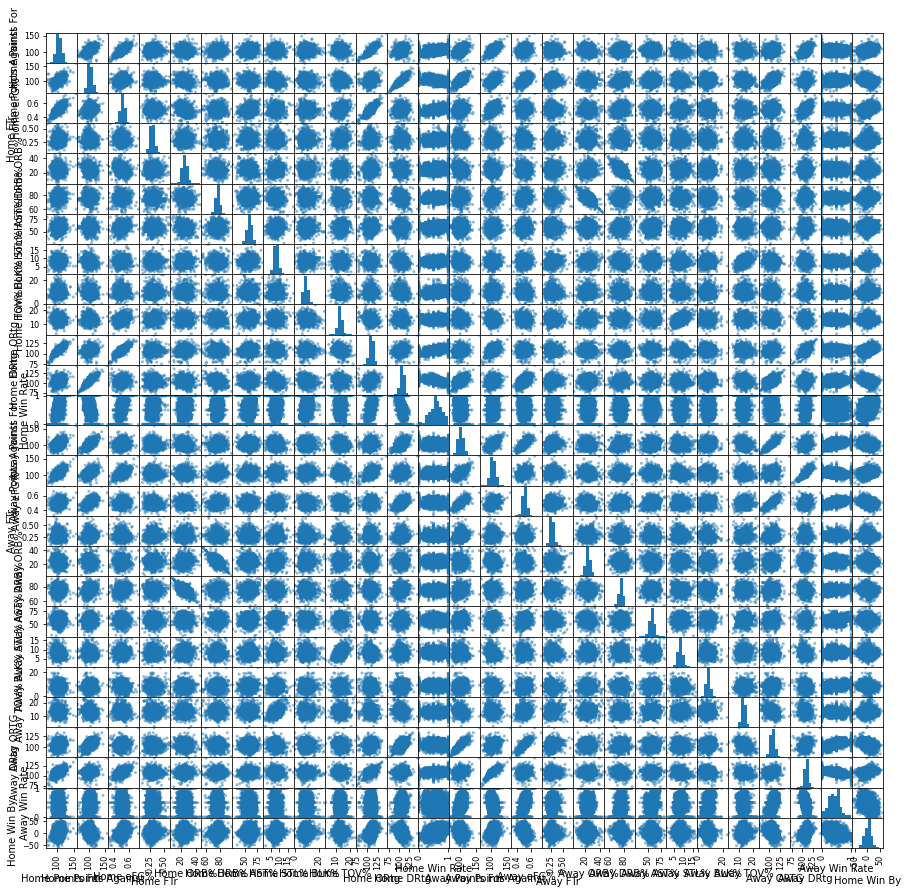

In [40]:
pd.plotting.scatter_matrix(all_stats, figsize=(15, 15));

In [34]:
# all_stats.to_csv('avg_by_game')
# odds.to_csv('nba_game_odds')